In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl

"""
This example shows how images are represented using pixels, color channels and data types.
"""

# read image to array
im = np.array(Image.open('d:/computervision/img_0.jpg'))
print("Shape is: {0} of type {1}".format(im.shape, im.dtype))

# read grayscale version to float array
im = np.array(Image.open('d:/computervision/img_0.jpg').convert('L'),'f')
print("Shape is: {0} of type {1}".format(im.shape, im.dtype))

# visualize the pixel value of a small region
col_1, col_2 = 190, 225
row_1, row_2 = 230, 265

# crop using array slicing
crop = im[col_1:col_2,row_1:row_2]
cols, rows = crop.shape

print("Created crop of shape: {0}".format(crop.shape))

Shape is: (2448, 3264, 3) of type uint8
Shape is: (2448, 3264) of type float32
Created crop of shape: (35, 35)


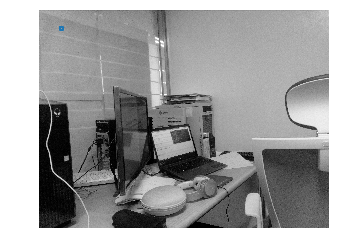

In [4]:
# generate all the plots
pl.figure()
pl.imshow(im)
pl.gray()
pl.plot([row_1, row_2, row_2, row_1, row_1], [col_1, col_1, col_2, col_2, col_1], linewidth=2)
pl.axis('off')
pl.show()

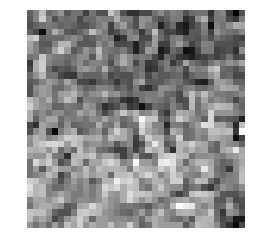

In [6]:
pl.figure()
pl.imshow(crop)
pl.gray()
pl.axis('off')
pl.show()

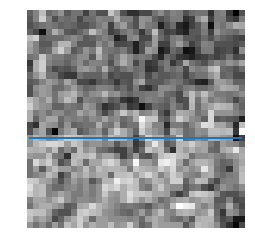

In [7]:
pl.figure()
pl.imshow(crop)
pl.gray()
pl.plot(20*np.ones(cols), linewidth=2)
pl.axis('off')
pl.show()

In [8]:
print(10*np.ones(cols)) 
range(10)

[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]


range(0, 10)

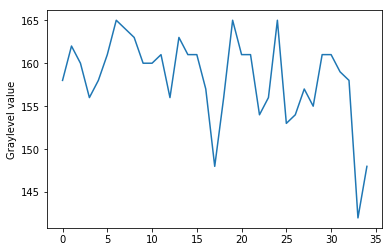

In [9]:
pl.figure()
pl.plot(crop[20,:])
pl.ylabel("Graylevel value")
pl.show()


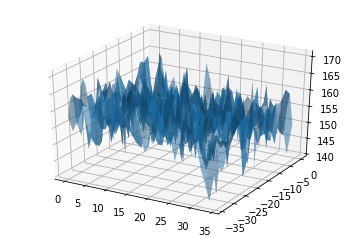

In [10]:
from mpl_toolkits.mplot3d import axes3d
fig = pl.figure()
ax = fig.gca(projection='3d')
# surface plot with transparency 0.5
X,Y = np.meshgrid(np.arange(cols),-np.arange(rows)) 
ax.plot_surface(X, Y, crop, alpha=0.5, cstride=2, rstride=2)
pl.show()

In [11]:
help(ax.plot_surface)

Help on method plot_surface in module mpl_toolkits.mplot3d.axes3d:

plot_surface(X, Y, Z, *args, **kwargs) method of matplotlib.axes._subplots.Axes3DSubplot instance
    Create a surface plot.
    
    By default it will be colored in shades of a solid color,
    but it also supports color mapping by supplying the *cmap*
    argument.
    
    The `rstride` and `cstride` kwargs set the stride used to
    sample the input data to generate the graph.  If 1k by 1k
    arrays are passed in, the default values for the strides will
    result in a 100x100 grid being plotted. Defaults to 10.
    Raises a ValueError if both stride and count kwargs
    (see next section) are provided.
    
    The `rcount` and `ccount` kwargs supersedes `rstride` and
    `cstride` for default sampling method for surface plotting.
    These arguments will determine at most how many evenly spaced
    samples will be taken from the input data to generate the graph.
    This is the default sampling method unless us

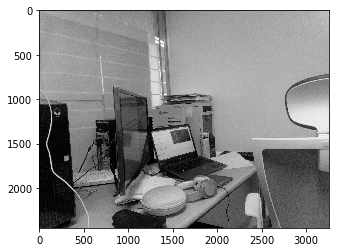

In [12]:
from PIL import Image
from numpy import *
from scipy.ndimage import measurements,morphology

"""
This is the morphology counting objects example in Section 1.4.
"""

# load image and threshold to make sure it is binary
im = array(Image.open('d:/computervision/img_0.jpg').convert('L'))
pl.figure();
pl.imshow(im)
pl.show();

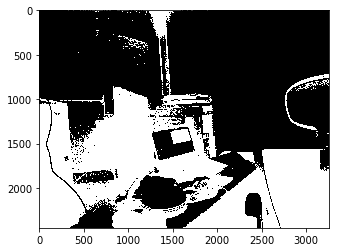

Number of objects: 15776
Number of objects: 63


In [13]:
im = (im<128)
pl.figure();
pl.imshow(im)
pl.show();

labels, nbr_objects = measurements.label(im)
print("Number of objects:", nbr_objects)

# morphology - opening to separate objects better
im_open = morphology.binary_opening(im,ones((9,5)),iterations=2) 

labels_open, nbr_objects_open = measurements.label(im_open)
print("Number of objects:", nbr_objects_open)